In [1]:
####################################### BIBLIOTECAS ########################
import pandas as pd
import numpy as np
from datetime import datetime, date
from matplotlib import pyplot as plt

####################################### LEITURA ARQUIVO ########################

######################## COLUNAS NECESSARIAS
#
#   N NOTIFICACAO
#   NOME PACIENTE
#   DATA NOTIFICAÇÃO
#   EVOLUCAO
#   DATA NASCIMENTO
#
############################################
nomePlanilha = 'arqsMain/covidProcessada.csv'

df = pd.read_csv(nomePlanilha, sep =';', encoding='UTF-8')
dfOriginal = df

#COLUNAS
cEvolucao = 'Evolução'
cDataNoti = 'Data da Notificação'


#### TXT ARQUIVO WRITE

corteLinha = "---------------------------------------------"
puloDuplo = "\n\n"

path = "graficos/Dados.txt"
arquivo = open(path, "w")
arquivo.write("ANÁLISE COVID " + nomePlanilha + puloDuplo + corteLinha + puloDuplo)

/tmp/ipykernel_20622/4163568241.py:20: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nomePlanilha, sep =';', encoding='UTF-8')


91

In [2]:
##MANTER CONFIRMADOS APENAS  SARS COV 2
contConfirmados = df['Resultado'].value_counts()


considerar = 'CORONAVÍRUS (SARS-COV2) E REAGENTE'

df = df.loc[
    ((df['Resultado']) == 'CORONAVÍRUS (SARS-COV2)') 
    | 
    ((df['Resultado']) == 'REAGENTE') 
    ]




################ PRINT E TXT

dfSContConfirmados = pd.DataFrame(contConfirmados)
nomeVariavel = dfSContConfirmados

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Casos confirmados considerando apenas: " + considerar + "\n\n")
    f.write(nomeVariavel_string)
    f.write(puloDuplo + corteLinha + puloDuplo)



In [3]:
#DATAS 

df['DATA_1'] = df[cDataNoti].str.slice(stop=10)


df['MES'] = df[cDataNoti].str.slice(start=5, stop=7).astype(int) #10/10/2010
df['ANO'] = df[cDataNoti].str.slice(stop=4).astype(int)

#df['MES'].astype(int)

##CORRIDO

df['MESCORRIDO'] = np.where(
    (df['ANO']== 2020), df['MES'], np.where(
    (df['ANO']== 2021), (df['MES']+12), np.where(
    (df['ANO']== 2022), (df['MES']+24), 'ERRO'))).astype(int)




#RELAÇAO OBITO 1 DOSE 2 dose barra

df['TOMOU1DOSE'] = np.where(
    df['Data da 1ª dose'].notna(), 'SIM', 'NAO')

df['TOMOU2DOSE'] = np.where(
    df['Data da 2ª dose'].notna(), 'SIM', 'NAO')

##REPETIR DFORIGINAL

dfOriginal['TOMOU1DOSE'] = np.where(
    dfOriginal['Data da 1ª dose'].notna(), 'SIM', 'NAO')

dfOriginal['TOMOU2DOSE'] = np.where(
    dfOriginal['Data da 2ª dose'].notna(), 'SIM', 'NAO')



df['IDADE']= (df["Idade"].astype(int))

mesCorrido = df['MESCORRIDO'].value_counts()





/tmp/ipykernel_20622/4232021984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATA_1'] = df[cDataNoti].str.slice(stop=10)
/tmp/ipykernel_20622/4232021984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MES'] = df[cDataNoti].str.slice(start=5, stop=7).astype(int) #10/10/2010
/tmp/ipykernel_20622/4232021984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [4]:
contagemCura = df[cEvolucao].value_counts()


################ PRINT E TXT

dfSContEvolucao = pd.DataFrame(contagemCura)
display(dfSContEvolucao)
nomeVariavel = dfSContEvolucao

somaEvolucao = (dfSContEvolucao['Evolução'].astype(int)).sum()



with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Evolução: \n\n"+nomeVariavel_string + "\n\n" + "Total: " +str(somaEvolucao))
    f.write(puloDuplo)

,Evolução
CURA,75059
NÃO SE APLICA,17106
ÓBITO POR COVID-19,1016
ÓBITO,397
ÓBITO POR OUTRAS CAUSAS,18


In [5]:
## diferenca de casos evolução

dfDiferença = df.loc[
    ((df['Evolução']) != 'CURA') & 
    ((df['Evolução']) != 'NÃO SE APLICA') & 
    ((df['Evolução']) != 'ÓBITO POR COVID-19') & 
    ((df['Evolução']) != 'ÓBITO') & 
    ((df['Evolução']) != 'ÓBITO POR OUTRAS CAUSAS') 
    ]

diferenca = len(dfDiferença.index)

with open(path, 'a') as f:
    f.write("Não classificados (EM BRANCO): " + str(diferenca))
    f.write(puloDuplo + corteLinha + puloDuplo)

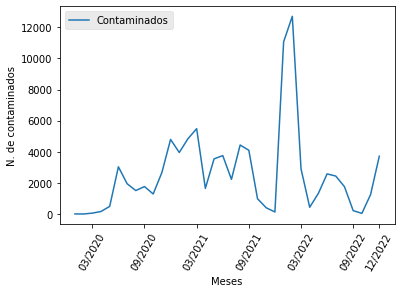

In [6]:
mesCorrido = mesCorrido.sort_index()

x = mesCorrido.index
y = mesCorrido


plt.plot(x, y, label='Contaminados')

plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')

#plt.title('TOTAL DE CASOS NOTIFICADOS EM 2020')

#eixoY = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
#eixoY = [0,20,40,60,80,100,120,140]

eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')
plt.legend(fontsize=10)


plt.savefig('graficos/graficoContaminados', dpi=300, bbox_inches = "tight")
plt.show()



In [7]:

## DATAFRAMES VACINADOS (original sem filtro)
dfOriginal1dose = dfOriginal.loc[((dfOriginal['TOMOU1DOSE']) == 'SIM') & ((dfOriginal['TOMOU2DOSE']) != 'SIM')]
dfOriginal2dose = dfOriginal.loc[(dfOriginal['TOMOU2DOSE']) == 'SIM']
dfOriginalNenhumaDose = dfOriginal.loc[(dfOriginal['TOMOU2DOSE'] != 'SIM') & (dfOriginal['TOMOU1DOSE'] != 'SIM')]

## DATAFRAMES VACINADOS
df1dose = df.loc[((df['TOMOU1DOSE']) == 'SIM') & ((df['TOMOU2DOSE']) != 'SIM')].sort_values('MESCORRIDO')
df2dose = df.loc[(df['TOMOU2DOSE']) == 'SIM'].sort_values('MESCORRIDO')
dfNenhumaDose = df.loc[(df['TOMOU2DOSE'] != 'SIM') & (df['TOMOU1DOSE'] != 'SIM')]



## DF OBITOS

dfObitos = df.loc[(df[cEvolucao] == 'ÓBITO POR COVID-19') | (df[cEvolucao] == 'ÓBITO')]
obitosMensal = dfObitos['MESCORRIDO'].value_counts().sort_index()

dfObitos.to_csv('arqsMain/dfObitos.csv', sep = ';', index = False, encoding='UTF-8')


#OBITOS VACINADOS
df1doseObitos = dfObitos.loc[((dfObitos['TOMOU1DOSE']) == 'SIM') & ((dfObitos['TOMOU2DOSE']) != 'SIM')].sort_values('MESCORRIDO')
df2doseObitos = dfObitos.loc[(dfObitos['TOMOU2DOSE']) == 'SIM'].sort_values('MESCORRIDO')
dfNenhumaDoseObitos = dfObitos.loc[(dfObitos['TOMOU2DOSE'] != 'SIM') & (dfObitos['TOMOU1DOSE'] != 'SIM')]


contaminadosMensal1dose = df1dose['MESCORRIDO'].value_counts().sort_index()
contaminadosMensal2dose = df2dose['MESCORRIDO'].value_counts().sort_index()


obitosAnual = dfObitos['ANO'].value_counts().sort_index()
obitosAnual1Dose = df1doseObitos['ANO'].value_counts().sort_index()
obitosAnual2Dose = df2doseObitos['ANO'].value_counts().sort_index()


#df['MESNOTIFICACAO'] = df['Data da Notificação'].dt.month

#dfObitos = df['Evolução']




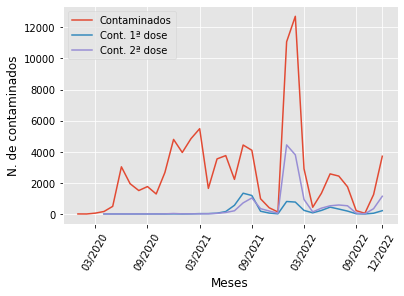

93630
6948
15649


In [8]:
##CONTAMINADOS MENSAL 1DOSE 2DOSE



x = mesCorrido.index
y = mesCorrido
x1 = contaminadosMensal1dose.index
y1 = contaminadosMensal1dose
x2 = contaminadosMensal2dose.index
y2 = contaminadosMensal2dose

plt.plot(x, y, label = 'Contaminados')
plt.plot(x1, y1, label = 'Cont. 1ª dose')
plt.plot(x2, y2, label = 'Cont. 2ª dose')


plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')


eixoY = [0,25,50,75,100,125,150,175]
eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')
plt.legend(fontsize=10)
plt.savefig('graficos/contaminadosMensal1dose2dose', dpi=300, bbox_inches = "tight")
plt.show()

print(sum(mesCorrido))
print(sum(contaminadosMensal1dose))
print(sum(contaminadosMensal2dose))



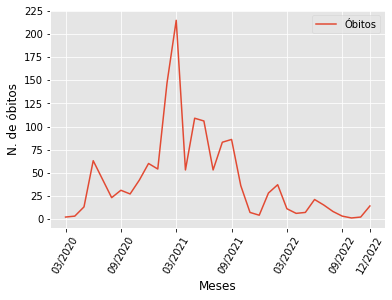

In [9]:
##OBITOS MENSAL 

x = obitosMensal.index
y = obitosMensal

plt.plot(x, y, label = 'Óbitos')


plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de óbitos').set_color('black')
plt.tick_params(colors='black', which='both')

eixoY = [0,25,50,75,100,125,150,175,200,225]
eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')

plt.xticks(eixoX, nomesEixoX)
plt.yticks(eixoY)
plt.legend(fontsize=10)


plt.savefig('graficos/obitosMensal', dpi=300, bbox_inches = "tight")
plt.show()




In [10]:
obitosMensal1dose = df1doseObitos['MESCORRIDO'].value_counts().sort_index()
obitosMensal2dose = df2doseObitos['MESCORRIDO'].value_counts().sort_index()


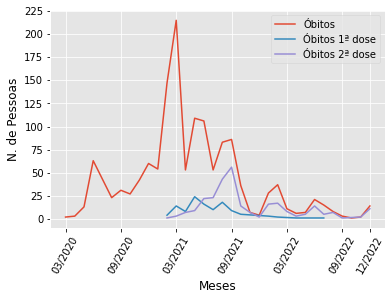

1413
116
276


In [11]:
##OBITOS MENSAL 1DOSE 2DOSE



x = obitosMensal.index
y = obitosMensal
x1 = obitosMensal1dose.index
y1 = obitosMensal1dose
x2 = obitosMensal2dose.index
y2 = obitosMensal2dose

plt.plot(x, y, label = 'Óbitos')
plt.plot(x1, y1, label = 'Óbitos 1ª dose')
plt.plot(x2, y2, label = 'Óbitos 2ª dose')


plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de Pessoas').set_color('black')
plt.tick_params(colors='black', which='both')



eixoY = [0,25,50,75,100,125,150,175,200,225]
eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')

plt.xticks(eixoX, nomesEixoX)
plt.yticks(eixoY)
plt.legend(fontsize=10)


plt.savefig('graficos/obitosMensal1dose2dose', dpi=300, bbox_inches = "tight")
plt.show()

print(sum(obitosMensal))
print(sum(obitosMensal1dose))
print(sum(obitosAnual2Dose))

In [12]:
##POR SEXO

dfMasc = df.loc[df['Sexo'] == 'M']
dfFem = df.loc[df['Sexo'] == 'F']



mensalMasc = dfMasc['MESCORRIDO'].value_counts().sort_index()
mensalFem = dfFem['MESCORRIDO'].value_counts().sort_index()


################ PRINT E TXT
contSexo = df['Sexo'].value_counts()
print(contSexo)

dfSContSexo= pd.DataFrame(contSexo)
display(dfSContSexo)
nomeVariavel = dfSContSexo

somaSexo = str(sum(pd.Series(contSexo)))


with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Casos confirmados por sexo: \n\n"+nomeVariavel_string
            +"\n\n"+"Soma: "+ somaSexo)
    f.write(puloDuplo + corteLinha + puloDuplo)

F    52057
M    41573
Name: Sexo, dtype: int64


,Sexo
F,52057
M,41573


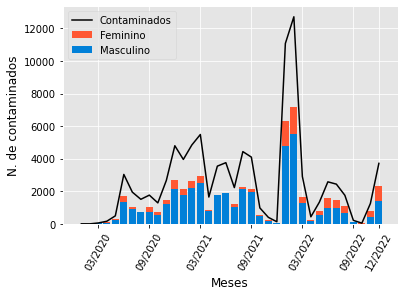

41573
52057


In [13]:
##CONTAMINADOS MENSAL 1DOSE 2DOSE



x = mensalMasc.index
y = mensalMasc
x1 = mensalFem.index
y1 = mensalFem
x2 = mesCorrido.index
y2 = mesCorrido

plt.bar(x1, y1, label = 'Feminino', color='#ff5733')
plt.bar(x, y, label = 'Masculino', color='#0180d8')

plt.plot(x2, y2, label = 'Contaminados', color='black')

plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')


eixoY = [0,25,50,75,100,125,150,175]

eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')
plt.legend(fontsize=10)


plt.savefig('graficos/contaminadosMensalporSexo', dpi=300, bbox_inches = "tight")
plt.show()

print(sum(mensalMasc))
print(sum(mensalFem))

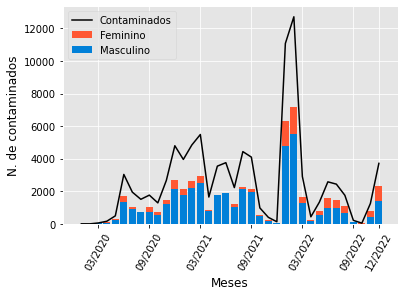

41573
52057


In [14]:
##CONTAMINADOS MENSAL 1DOSE 2DOSE



x = mensalMasc.index
y = mensalMasc
x1 = mensalFem.index
y1 = mensalFem
x2 = mesCorrido.index
y2 = mesCorrido

plt.bar(x1, y1, label = 'Feminino', color='#ff5733')
plt.bar(x, y, label = 'Masculino', color='#0180d8')

plt.plot(x2, y2, label = 'Contaminados', color='black')

plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')


eixoY = [0,25,50,75,100,125,150,175]

eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']

plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')
plt.legend(fontsize=10)


plt.savefig('graficos/contaminadosMensalporSexo', dpi=300, bbox_inches = "tight")
plt.show()

print(sum(mensalMasc))
print(sum(mensalFem))

In [15]:
## PRINT TXT  CONTAMINADOS e VACINAÇÃO

cont1 = str(len(dfNenhumaDose.index))
cont2 = str(len(df1dose.index))
cont3 = str(len(df2dose.index))
cont4 = str(len(df.index))


with open(path, 'a') as f:
    f.write("Vacinação: " + puloDuplo)
    f.write("Nenhuma dose: "+ cont1 + "\n")
    f.write("1a dose: "+ cont2 + "\n")
    f.write("2a dose: "+ cont3 + "\n")
    f.write("Total confirmados: "+ cont4)
    f.write(puloDuplo + corteLinha + puloDuplo)


In [16]:
##IDADE

#df['ANONASCI'] = df['Data de Nascimento'].str.slice(start=6, stop=10)





cont0a9 = (df.loc[(df['IDADE']) <= 9])['IDADE'].value_counts().sum()
cont10a19 = (df.loc[(df['IDADE'] >= 10) & (df['IDADE'] <= 19)])['IDADE'].value_counts().sum()
cont20a29 = (df.loc[(df['IDADE'] >= 20) & (df['IDADE'] <= 29)])['IDADE'].value_counts().sum()
cont30a39 = (df.loc[(df['IDADE'] >= 30) & (df['IDADE'] <= 39)])['IDADE'].value_counts().sum()
cont40a49 = (df.loc[(df['IDADE'] >= 40) & (df['IDADE'] <= 49)])['IDADE'].value_counts().sum()
cont50a59 = (df.loc[(df['IDADE'] >= 50) & (df['IDADE'] <= 59)])['IDADE'].value_counts().sum()
cont60a69 = (df.loc[(df['IDADE'] >= 60) & (df['IDADE'] <= 69)])['IDADE'].value_counts().sum()
cont70a79 = (df.loc[(df['IDADE'] >= 70) & (df['IDADE'] <= 79)])['IDADE'].value_counts().sum()
cont80a90 = (df.loc[(df['IDADE'] >= 80) & (df['IDADE'] <= 89)])['IDADE'].value_counts().sum()

cont90mais = (df.loc[(df['IDADE']) >= 90])['IDADE'].value_counts().sum()





In [17]:
contIdades = [

cont0a9,
cont10a19,
cont20a29,
cont30a39,
cont40a49,
cont50a59,
cont60a69,
cont70a79,
cont80a90,
cont90mais,

]

print(contIdades)


################ PRINT E TXT
indexIdade = [
'0 a 9', 
'10 a 19', 
'20 a 29', 
'30 a 39', 
'40 a 49', 
'50 a 59',
'60 a 69',
'70 a 79',
'80 a 89',
'Acima de 90'
]

dfSContIdades= pd.DataFrame(contIdades, index = indexIdade)
display(dfSContIdades)
nomeVariavel = dfSContIdades

somasIdade = str(sum(pd.Series(contIdades)))

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Faixa etária confirmados: \n\n"+nomeVariavel_string    
            +"\n\nTotal: " + somasIdade
            )
    f.write(puloDuplo + corteLinha + puloDuplo)

print(somasIdade)

[4431, 7476, 19735, 20551, 16706, 12489, 7101, 3487, 1365, 289]


,0
0 a 9,4431
10 a 19,7476
20 a 29,19735
30 a 39,20551
40 a 49,16706
50 a 59,12489
60 a 69,7101
70 a 79,3487
80 a 89,1365
Acima de 90,289


93630


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


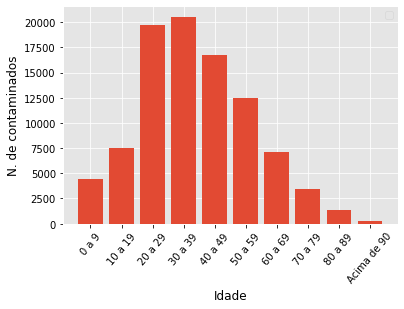

0     4431
1     7476
2    19735
3    20551
4    16706
5    12489
6     7101
7     3487
8     1365
9      289
dtype: int64
93630


In [18]:
contIdades = pd.Series(contIdades)

x = contIdades.index
y = contIdades


plt.bar(x, y)

plt.style.use("ggplot")

plt.xlabel('Idade').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')



eixoX = [0,1,2,3,4,5,6,7,8,9]

nomesEixoX = [
'0 a 9', 
'10 a 19', 
'20 a 29', 
'30 a 39', 
'40 a 49', 
'50 a 59',
'60 a 69',
'70 a 79',
'80 a 89',
'Acima de 90'
]

plt.xticks(eixoX, nomesEixoX, rotation =50, color = 'black')
plt.legend(fontsize=10)


plt.savefig('graficos/contaminadosPorIdade', dpi=300, bbox_inches = "tight")
plt.show()
print(contIdades)
print(sum(contIdades))


In [19]:
##IDADE OBITO




cont0a9 = (dfObitos.loc[(dfObitos['IDADE']) <= 9])['IDADE'].value_counts().sum()
cont10a19 = (dfObitos.loc[(dfObitos['IDADE'] >= 10) & (dfObitos['IDADE'] <= 19)])['IDADE'].value_counts().sum()
cont20a29 = (dfObitos.loc[(dfObitos['IDADE'] >= 20) & (dfObitos['IDADE'] <= 29)])['IDADE'].value_counts().sum()
cont30a39 = (dfObitos.loc[(dfObitos['IDADE'] >= 30) & (dfObitos['IDADE'] <= 39)])['IDADE'].value_counts().sum()
cont40a49 = (dfObitos.loc[(dfObitos['IDADE'] >= 40) & (dfObitos['IDADE'] <= 49)])['IDADE'].value_counts().sum()
cont50a59 = (dfObitos.loc[(dfObitos['IDADE'] >= 50) & (dfObitos['IDADE'] <= 59)])['IDADE'].value_counts().sum()
cont60a69 = (dfObitos.loc[(dfObitos['IDADE'] >= 60) & (dfObitos['IDADE'] <= 69)])['IDADE'].value_counts().sum()
cont70a79 = (dfObitos.loc[(dfObitos['IDADE'] >= 70) & (dfObitos['IDADE'] <= 79)])['IDADE'].value_counts().sum()
cont80a90 = (dfObitos.loc[(dfObitos['IDADE'] >= 80) & (dfObitos['IDADE'] <= 89)])['IDADE'].value_counts().sum()

cont90mais = (dfObitos.loc[(dfObitos['IDADE']) >= 90])['IDADE'].value_counts().sum()

contIdadesObitos = [

cont0a9,
cont10a19,
cont20a29,
cont30a39,
cont40a49,
cont50a59,
cont60a69,
cont70a79,
cont80a90,
cont90mais,

]


print(sum(contIdadesObitos))

dfSContIdadesObitos= pd.DataFrame(contIdadesObitos, index = indexIdade)
display(dfSContIdadesObitos)
nomeVariavel = dfSContIdadesObitos

total= str(sum(pd.Series(contIdadesObitos)))

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Faixa etária de óbitos: \n\n"+nomeVariavel_string    
            +"\n\nTotal: " + total
            )
    f.write(puloDuplo + corteLinha + puloDuplo)



## SOMA IGUA 283.596 =3 4 CASOS DESCARTADOS





1413


,0
0 a 9,10
10 a 19,7
20 a 29,18
30 a 39,57
40 a 49,103
50 a 59,233
60 a 69,295
70 a 79,352
80 a 89,271
Acima de 90,67


In [20]:
## PRINT TXT  CONTAMINADOS e VACINAÇÃO DE OBITOS

cont1 = str(len(dfNenhumaDoseObitos.index))
cont2 = str(len(df1doseObitos.index))
cont3 = str(len(df2doseObitos.index))
cont4 = str(len(dfObitos.index))


with open(path, 'a') as f:
    f.write("Obitos por vacinação: " + puloDuplo)
    f.write("Nenhuma dose: "+ cont1 + "\n")
    f.write("1a dose: "+ cont2 + "\n")
    f.write("2a dose: "+ cont3 + "\n")
    f.write("Total confirmados: "+ cont4)
    f.write(puloDuplo + corteLinha + puloDuplo)


In [21]:
## PRINT TXT OBITOS POR SEXO

################ PRINT E TXT
contSexoObitos = dfObitos['Sexo'].value_counts()

dfSContSexoObitos= pd.DataFrame(contSexoObitos)
display(dfSContSexoObitos)
nomeVariavel = dfSContSexoObitos

somaSexo = str(sum(pd.Series(contSexoObitos)))


with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Óbitos por sexo: \n\n"+nomeVariavel_string
            +"\n\n"+"Soma: "+ somaSexo)
    f.write(puloDuplo + corteLinha + puloDuplo)


,Sexo
M,850
F,563


In [22]:
##IDADE OBITO NENHUMA DOSE

cont0a9 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE']) <= 9])['IDADE'].value_counts().sum()
cont10a19 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 10) & (dfNenhumaDoseObitos['IDADE'] <= 19)])['IDADE'].value_counts().sum()
cont20a29 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 20) & (dfNenhumaDoseObitos['IDADE'] <= 29)])['IDADE'].value_counts().sum()
cont30a39 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 30) & (dfNenhumaDoseObitos['IDADE'] <= 39)])['IDADE'].value_counts().sum()
cont40a49 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 40) & (dfNenhumaDoseObitos['IDADE'] <= 49)])['IDADE'].value_counts().sum()
cont50a59 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 50) & (dfNenhumaDoseObitos['IDADE'] <= 59)])['IDADE'].value_counts().sum()
cont60a69 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 60) & (dfNenhumaDoseObitos['IDADE'] <= 69)])['IDADE'].value_counts().sum()
cont70a79 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 70) & (dfNenhumaDoseObitos['IDADE'] <= 79)])['IDADE'].value_counts().sum()
cont80a90 = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE'] >= 80) & (dfNenhumaDoseObitos['IDADE'] <= 89)])['IDADE'].value_counts().sum()
cont90mais = (dfNenhumaDoseObitos.loc[(dfNenhumaDoseObitos['IDADE']) >= 90])['IDADE'].value_counts().sum()

contIdades0obitos = [

cont0a9,
cont10a19,
cont20a29,
cont30a39,
cont40a49,
cont50a59,
cont60a69,
cont70a79,
cont80a90,
cont90mais,

]

##IDADE OBITO 1 DOSE

cont0a9 = (df1doseObitos.loc[(df1doseObitos['IDADE']) <= 9])['IDADE'].value_counts().sum()
cont10a19 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 10) & (df1doseObitos['IDADE'] <= 19)])['IDADE'].value_counts().sum()
cont20a29 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 20) & (df1doseObitos['IDADE'] <= 29)])['IDADE'].value_counts().sum()
cont30a39 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 30) & (df1doseObitos['IDADE'] <= 39)])['IDADE'].value_counts().sum()
cont40a49 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 40) & (df1doseObitos['IDADE'] <= 49)])['IDADE'].value_counts().sum()
cont50a59 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 50) & (df1doseObitos['IDADE'] <= 59)])['IDADE'].value_counts().sum()
cont60a69 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 60) & (df1doseObitos['IDADE'] <= 69)])['IDADE'].value_counts().sum()
cont70a79 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 70) & (df1doseObitos['IDADE'] <= 79)])['IDADE'].value_counts().sum()
cont80a90 = (df1doseObitos.loc[(df1doseObitos['IDADE'] >= 80) & (df1doseObitos['IDADE'] <= 89)])['IDADE'].value_counts().sum()
cont90mais = (df1doseObitos.loc[(df1doseObitos['IDADE']) >= 90])['IDADE'].value_counts().sum()

contIdades1obitos = [

cont0a9,
cont10a19,
cont20a29,
cont30a39,
cont40a49,
cont50a59,
cont60a69,
cont70a79,
cont80a90,
cont90mais,

]

##IDADE OBITO 2 DOSE

cont0a9 = (df2doseObitos.loc[(df2doseObitos['IDADE']) <= 9])['IDADE'].value_counts().sum()
cont10a19 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 10) & (df2doseObitos['IDADE'] <= 19)])['IDADE'].value_counts().sum()
cont20a29 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 20) & (df2doseObitos['IDADE'] <= 29)])['IDADE'].value_counts().sum()
cont30a39 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 30) & (df2doseObitos['IDADE'] <= 39)])['IDADE'].value_counts().sum()
cont40a49 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 40) & (df2doseObitos['IDADE'] <= 49)])['IDADE'].value_counts().sum()
cont50a59 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 50) & (df2doseObitos['IDADE'] <= 59)])['IDADE'].value_counts().sum()
cont60a69 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 60) & (df2doseObitos['IDADE'] <= 69)])['IDADE'].value_counts().sum()
cont70a79 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 70) & (df2doseObitos['IDADE'] <= 79)])['IDADE'].value_counts().sum()
cont80a90 = (df2doseObitos.loc[(df2doseObitos['IDADE'] >= 80) & (df2doseObitos['IDADE'] <= 89)])['IDADE'].value_counts().sum()
cont90mais = (df2doseObitos.loc[(df2doseObitos['IDADE']) >= 90])['IDADE'].value_counts().sum()

contIdades2obitos = [

cont0a9,
cont10a19,
cont20a29,
cont30a39,
cont40a49,
cont50a59,
cont60a69,
cont70a79,
cont80a90,
cont90mais,

]





## SOMA IGUA 283.596 =3 4 CASOS DESCARTADOS

## FAIXA ETARIA OBITOS POR NENHUMA DOSE

dfAux= pd.DataFrame(contIdades0obitos, index = indexIdade)
display(dfAux)
nomeVariavel = dfAux

total= str(sum(pd.Series(contIdades0obitos)))

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Faixa etária de óbitos (NENHUMA DOSE): \n\n"+nomeVariavel_string    
            +"\n\nTotal: " + total
            )
    f.write(puloDuplo + corteLinha + puloDuplo)

## FAIXA ETARIA OBITOS POR 1 DOSE

dfAux= pd.DataFrame(contIdades1obitos, index = indexIdade)
display(dfAux)
nomeVariavel = dfAux

total= str(sum(pd.Series(contIdades1obitos)))

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Faixa etária de óbitos (TOMOU 1 DOSE): \n\n"+nomeVariavel_string    
            +"\n\nTotal: " + total
            )
    f.write(puloDuplo + corteLinha + puloDuplo)

## FAIXA ETARIA OBITOS POR 2 DOSE

dfAux= pd.DataFrame(contIdades2obitos, index = indexIdade)
display(dfAux)
nomeVariavel = dfAux

total= str(sum(pd.Series(contIdades2obitos)))

with open(path, 'a') as f:
    nomeVariavel_string = nomeVariavel.to_string(header=False, index=True)
    f.write("Faixa etária de óbitos (TOMOU 2 DOSE): \n\n"+nomeVariavel_string    
            +"\n\nTotal: " + total
            )
    f.write(puloDuplo + corteLinha + puloDuplo)

## SERIES DOSES OBITOS

contIdades0obitos = pd.Series(contIdades0obitos)
contIdades1obitos = pd.Series(contIdades1obitos)
contIdades2obitos = pd.Series(contIdades2obitos)



,0
0 a 9,10
10 a 19,6
20 a 29,17
30 a 39,47
40 a 49,89
50 a 59,198
60 a 69,226
70 a 79,241
80 a 89,153
Acima de 90,34


,0
0 a 9,0
10 a 19,0
20 a 29,0
30 a 39,7
40 a 49,10
50 a 59,27
60 a 69,26
70 a 79,20
80 a 89,22
Acima de 90,4


,0
0 a 9,0
10 a 19,1
20 a 29,1
30 a 39,3
40 a 49,4
50 a 59,8
60 a 69,43
70 a 79,91
80 a 89,96
Acima de 90,29


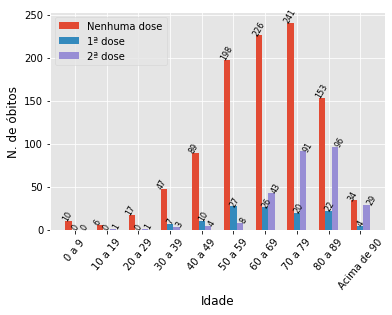

In [23]:
##IDADE OBITO MESCLADO GRAFICO


x = contIdades0obitos.index
y = contIdades0obitos
x1 = contIdades1obitos.index
y1 = contIdades1obitos
x2 = contIdades2obitos.index
y2 = contIdades2obitos

largura = 0.2

plt.bar(x-largura, y, largura,label = 'Nenhuma dose')
plt.bar(x1,y1, largura,label = '1ª dose')
plt.bar(x2+largura,y2, largura,label = '2ª dose')

plt.style.use("ggplot")

plt.xlabel('Idade').set_color('black')
plt.ylabel('N. de óbitos').set_color('black')
plt.tick_params(colors='black', which='both')


eixoX = [0,1,2,3,4,5,6,7,8,9]

nomesEixoX = [
'0 a 9', 
'10 a 19', 
'20 a 29', 
'30 a 39', 
'40 a 49', 
'50 a 59',
'60 a 69',
'70 a 79',
'80 a 89',
'Acima de 90'
]

plt.xticks(eixoX, nomesEixoX, rotation =50, color = 'black')
plt.legend(fontsize=10, loc='upper left')


for i, v in enumerate(y): 
    plt.text(i-.45, v+.5, str(v),  
            color = 'black', fontsize = 8, ma='center', rotation = 60)

for i, v in enumerate(y1): 
    plt.text(i-.15, v+.5, str(v), 
            color = 'black', fontsize = 8, ma='center', rotation = 60)

for i, v in enumerate(y2): 
    plt.text(i+.15, v+.5, str(v),  
            color = 'black', fontsize = 8, ma='center', rotation = 60)


plt.savefig('graficos/obitosPorIdademesclado dose', dpi=300, bbox_inches = "tight")
plt.show()

In [24]:
##OBITOS TEMPORAL POR SEXO

dfMascObitos = dfObitos.loc[df['Sexo'] == 'M']
dfFemObitos = dfObitos.loc[df['Sexo'] == 'F']



mensalMascObitos = dfMascObitos['MESCORRIDO'].value_counts().sort_index()
mensalFemObitos = dfFemObitos['MESCORRIDO'].value_counts().sort_index()




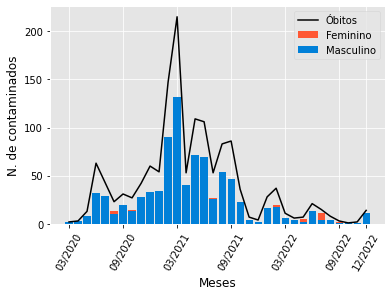

41573
52057


In [25]:
##OBITOS TEMPORAL POR SEXO



x = mensalMascObitos.index
y = mensalMascObitos
x1 = mensalFemObitos.index
y1 = mensalFemObitos
x2 = obitosMensal.index
y2 = obitosMensal


plt.bar(x1, y1, label = 'Feminino', color='#ff5733')
plt.bar(x, y, label = 'Masculino', color='#0180d8')

plt.plot(x2, y2, label = 'Óbitos', color='black')

plt.style.use("ggplot")

plt.xlabel('Meses').set_color('black')
plt.ylabel('N. de contaminados').set_color('black')
plt.tick_params(colors='black', which='both')


eixoY = [0,25,50,75,100,125,150,175]

eixoX = [3,9,15,21,27,33,36]
nomesEixoX = ['03/2020', '09/2020', '03/2021', '09/2021', '03/2022', '09/2022', '12/2022']


plt.xticks(eixoX, nomesEixoX, rotation =60, color = 'black')
plt.legend(fontsize=10)




plt.savefig('graficos/obitosMensalporSexo', dpi=300, bbox_inches = "tight")
plt.show()

print(sum(mensalMasc))
print(sum(mensalFem))

In [26]:
## SEPARAR POR ANO  E -59 / IDOSOS
df2020Obitos = dfObitos.loc[dfObitos["ANO"] == "2020"]
df2021Obitos = dfObitos.loc[dfObitos["ANO"] == "2021"]
df2022Obitos = dfObitos.loc[dfObitos["ANO"] == "2022"]

display(df2020Obitos)

df2020Obitos0 = dfNenhumaDoseObitos.loc[dfNenhumaDoseObitos["ANO"] == "2020"]
df2021Obitos0 = dfNenhumaDoseObitos.loc[dfNenhumaDoseObitos["ANO"] == "2021"]
df2022Obitos0 = dfNenhumaDoseObitos .loc[dfNenhumaDoseObitos["ANO"] == "2022"]

df2020Obitos1 = df1doseObitos.loc[df1doseObitos["ANO"] == "2020"]
df2021Obitos1 = df1doseObitos.loc[df1doseObitos["ANO"] == "2021"]
df2022Obitos1 = df1doseObitos.loc[df1doseObitos["ANO"] == "2022"]

df2020Obitos2 = df2doseObitos.loc[df2doseObitos["ANO"] == "2020"]
df2021Obitos2 = df2doseObitos.loc[df2doseObitos["ANO"] == "2021"]
df2022Obitos2 = df2doseObitos.loc[df2doseObitos["ANO"] == "2022"]


#OBITOS ANO 1 COLUNA
# JOVENS OBITOS
jdf2020Obitos = df2020Obitos.loc[df2020Obitos['IDADE'] <= 59]
jdf2021Obitos = df2021Obitos.loc[df2021Obitos['IDADE'] <= 59]
jdf2022Obitos = df2022Obitos.loc[df2022Obitos['IDADE'] <= 59]

# IDOSOS OBITOS
idf2020Obitos = df2020Obitos.loc[df2020Obitos['IDADE'] >= 60]
idf2021Obitos = df2021Obitos.loc[df2021Obitos['IDADE'] >= 60]
idf2022Obitos = df2022Obitos.loc[df2022Obitos['IDADE'] >= 60]


#0 DOSE - 2 coluna
# JOVENS
jdf2020Obitos0 = df2020Obitos0.loc[df2020Obitos0['IDADE'] <= 59]
jdf2021Obitos0 = df2021Obitos0.loc[df2021Obitos0['IDADE'] <= 59]
jdf2022Obitos0 = df2022Obitos0.loc[df2022Obitos0['IDADE'] <= 59]
# IDOSOS 
idf2020Obitos0 = df2020Obitos0.loc[df2020Obitos0['IDADE'] >= 60]
idf2021Obitos0 = df2021Obitos0.loc[df2021Obitos0['IDADE'] >= 60]
idf2022Obitos0 = df2022Obitos0.loc[df2022Obitos0['IDADE'] >= 60]

#1 DOSE - 3 coluna
# JOVENS
jdf2020Obitos1 = df2020Obitos1.loc[df2020Obitos1['IDADE'] <= 59]
jdf2021Obitos1 = df2020Obitos1.loc[df2021Obitos1['IDADE'] <= 59]
jdf2022Obitos1 = df2020Obitos1.loc[df2022Obitos1['IDADE'] <= 59]
# IDOSOS 
idf2020Obitos1 = df2020Obitos1.loc[df2020Obitos1['IDADE'] >= 60]
idf2021Obitos1 = df2021Obitos1.loc[df2021Obitos1['IDADE'] >= 60]
idf2022Obitos1 = df2022Obitos1.loc[df2022Obitos1['IDADE'] >= 60]

#2 DOSE 4 coluna
# JOVENS
jdf2020Obitos2 = df2020Obitos2.loc[df2020Obitos2['IDADE'] <= 59]
jdf2021Obitos2 = df2020Obitos2.loc[df2021Obitos2['IDADE'] <= 59]
jdf2022Obitos2 = df2020Obitos2.loc[df2022Obitos2['IDADE'] <= 59]
# IDOSOS 
idf2020Obitos2 = df2020Obitos2.loc[df2020Obitos2['IDADE'] >= 60]
idf2021Obitos2 = df2021Obitos2.loc[df2021Obitos2['IDADE'] >= 60]
idf2022Obitos2 = df2022Obitos2.loc[df2022Obitos2['IDADE'] >= 60]

In [27]:
# TABELA CASOS

#2020
ax=str(  len(jdf2020Obitos.index) )
bx=str(  len(jdf2020Obitos0.index) )
cx=str(  len(jdf2020Obitos1.index) )
c1x=str(  len(jdf2020Obitos2.index) )

dx=str(  len(idf2020Obitos.index) )
ex=str(  len(idf2020Obitos0.index) )
fx=str(  len(idf2020Obitos1.index) )
f1x=str(  len(idf2020Obitos2.index) )

#2021
gx=str(  len(jdf2021Obitos.index) )
hx=str(  len(jdf2021Obitos0.index) )
ix=str(  len(jdf2021Obitos1.index) )
i1x=str(  len(jdf2021Obitos2.index) )

jx=str(  len(idf2021Obitos.index) )
kx=str(  len(idf2021Obitos0.index) )
lx=str(  len(idf2021Obitos1.index) )
l1x=str(  len(idf2021Obitos2.index) )

#2022
mx=str(  len(jdf2022Obitos.index) )
nx=str(  len(jdf2022Obitos0.index) )
ox=str(  len(jdf2022Obitos1.index) )
o1x=str(  len(jdf2022Obitos2.index) )

px=str(  len(idf2022Obitos.index) )
qx=str(  len(idf2022Obitos0.index) )
rx=str(  len(idf2022Obitos1.index) )
r1x=str(  len(idf2022Obitos2.index) )




with open(path, 'a') as f:
    f.write("TABELA CASOS NOTIFICADOS CONFIRMADOS E OBITOS"+   "\n\n")
    f.write("Ano; Óbitos;Nenhuma dose; 1ª dose; 2ª dose; Óbitos;Nenhuma dose; 1ª dose; 2ª dose"+   "\n")
    f.write("2020;" +  ax + ";" + bx + ";" + cx + ";" + c1x + ";" + dx + ";" + ex + ";" + fx + ";" + f1x +"\n")
    f.write("2021;" +  gx + ";" + hx + ";" + ix + ";" + i1x + ";" + jx + ";" + kx + ";" + lx + ";" + l1x +"\n")
    f.write("2022;" +  mx + ";" + nx + ";" + ox + ";" + o1x + ";" + px + ";" + qx + ";" + rx + ";" + r1x)
    f.write(puloDuplo + corteLinha + puloDuplo)

In [28]:
# REFEITO ATE AQUI

In [29]:
# TABELA CASOS

a=str(  len(dfOriginal.index) )
b=str(  len(dfOriginal1dose.index) )
c=str(  len(dfOriginal2dose.index) )

d=str(  len(df.index) )
e=str(  len(df1dose.index) )
f1=str(  len(df2dose.index) )

g=str(  len(dfNenhumaDoseObitos.index) )
h=str(  len(df1doseObitos.index) )
i=str(  len(df2doseObitos.index) )



with open(path, 'a') as f:
    f.write("TABELA CASOS NOTIFICADOS CONFIRMADOS E OBITOS"+   "\n\n")
    f.write("Casos; Nenhuma dose; 1ª dose; 2ª dose"+   "\n")
    f.write("Notificados;" +  a + ";" + b + ";" +  c + "\n")
    f.write("Confirmados;" +  d + ";" + e + ";" + f1 + "\n")
    f.write("Óbitos;" +       g + ";" + h + ";" +  i)
    f.write(puloDuplo + corteLinha + puloDuplo)

In [30]:

print('\ OBITOS por ano')
print('\ OBITOS')
print('\ OBITOS 1 DOSE \n')
print('\ OBITOS 2 DOSE \n')
print('\ OBITOS nenhuma DOSE \n')

print('\n IDOSOS OBITOS 60+') 
print('\n IDOSOS OBITOS 1 DOSE \n')
print('\n IDOSOS OBITOS 2 DOSE \n')
print('\n IDOSOS OBITOS nenhuma DOSE \n')


\ OBITOS por ano
\ OBITOS
\ OBITOS 1 DOSE 

\ OBITOS 2 DOSE 

\ OBITOS nenhuma DOSE 


 IDOSOS OBITOS 60+

 IDOSOS OBITOS 1 DOSE 


 IDOSOS OBITOS 2 DOSE 


 IDOSOS OBITOS nenhuma DOSE 

